In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set_theme()

In [11]:
# load npz file
bund = np.load('../datasets/X-Tick/bund.npz', allow_pickle=True)

In [39]:
bund['20140423']

array([array([ 1053.209199,  1053.209908,  1053.280855, ..., 50355.298439,
              50355.298595, 50376.291568])                                ,
       array([ 1053.23084 ,  1053.310435,  1053.310787, ..., 50372.173392,
              50373.178114, 50391.345989])                                ,
       array([ 1050.633172,  1050.635073,  1053.222378, ..., 50392.05344 ,
              50395.408549, 50395.973549])                                ,
       array([ 1053.230265,  1053.310129,  1060.707673, ..., 50379.603678,
              50381.116953, 50390.021102])                                ],
      dtype=object)

In [55]:
def simulate_poisson_process(lambda_, T):
    t = 0
    N = 0
    arrivals = []
    while t < T:
        t += np.random.exponential(1/lambda_)
        if t < T:
            N += 1
            arrivals.append(t)
    return N, arrivals


T = 100
lambda_ = 1
N, arrivals = simulate_poisson_process(lambda_, T)
lambda_est = N / T
print(f'Estimated lambda: {lambda_est} when true lambda is {lambda_}')

Estimated lambda: 1.12 when true lambda is 1


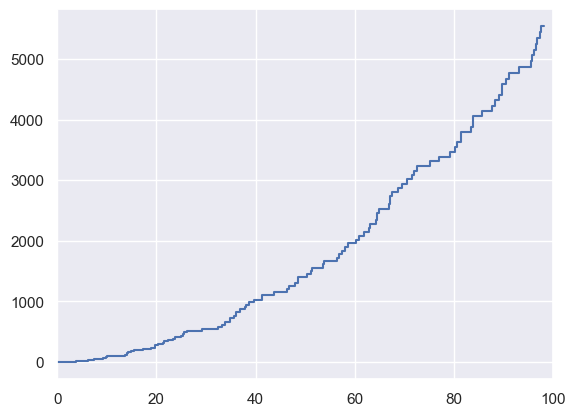

Estimated lambda: 1.12 when true lambda is 1


(1.12, -99.30718724561565)

In [75]:
# plot line for arrival times
plt.step(arrivals, np.cumsum(arrivals), label='Poisson process')
plt.xlim(0, T)
plt.show()

lambda_est = N / T
print(f'Estimated lambda: {lambda_est} when true lambda is {lambda_}')
ppi = inference.PoissonProcessInference()
ppi.estimate(timestamps=np.array(arrivals), T=T, return_result=True)

In [77]:
from HawkesPyLib import inference, simulation

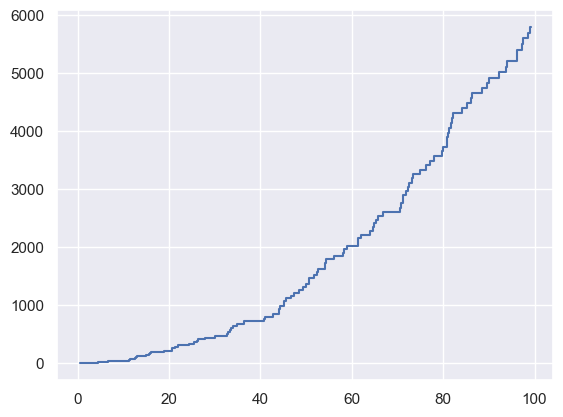

In [113]:
mu = 1
eta = 0.1
theta = 100000
T = 100
seed = 42
exphwk = simulation.ExpHawkesProcessSimulation(mu, eta, theta)
timestamps = exphwk.simulate(T, seed)
plt.step(timestamps, np.cumsum(timestamps), label='Hawkes process')

In [116]:
df = pd.read_csv("../datasets/TrueFX/EURUSD-2024-02/EURUSD-2024-02.csv", header=None)
df.columns = ['Pair', 'TimeStamp', 'Bid', 'Ask']

In [117]:
df

,Pair,TimeStamp,Bid,Ask
0,EUR/USD,20240201 00:00:00.080,1.08036,1.08043
1,EUR/USD,20240201 00:00:00.205,1.08037,1.08043
2,EUR/USD,20240201 00:00:00.236,1.08036,1.08043
3,EUR/USD,20240201 00:00:00.643,1.08036,1.08042
4,EUR/USD,20240201 00:00:00.643,1.08036,1.08043
...,...,...,...,...
14272966,EUR/USD,20240229 23:59:59.104,1.08052,1.08062
14272967,EUR/USD,20240229 23:59:59.135,1.08055,1.08059
14272968,EUR/USD,20240229 23:59:59.229,1.08052,1.08062
14272969,EUR/USD,20240229 23:59:59.244,1.08055,1.08059
